$\qquad$ $\qquad$$\qquad$ **TDA 231 Machine Learning: Homework 4** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Support Vector Machines**<br />
$\qquad$ $\qquad$$\qquad$ **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$ **Due Date: 14/5** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Hai Dinh, 19960331-4494, hasy@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Christopher Meszaros, 19930707-2778,  meszaros@student.chalmers.se** <br />

# Common codes

In order to avoid repeated codes, we define some common functions in this section. The piece of codes written below must be executed before any other codes. 

In [0]:
### COMMON CODES (must be executed before any other codes)
!pip install -q wget
!pip install -q cvxopt
import wget
import cvxopt
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from math import sqrt
cvxopt.solvers.options['show_progress'] = False


def getColors(targets):
    return ['b' if t == 1 else 'r' for t in targets]

  
def plot_support_vectors(sv_points, sv_targets):
    plt.scatter(sv_points[:,0], sv_points[:,1], s=100, linewidth=1,
                edgecolors=getColors(sv_targets), facecolors='none')

         
def plot_linear_boundary(w, xmin, xmax):
    w0, w1, w2 = w
    xs = np.linspace(xmin, xmax, num=1000)
    ys = (w0 + w1 * xs) / -w2
    plt.plot(xs, ys, dashes=[4, 2])
    
    
def plot_nonlinear_boundary(model, xmin, xmax, ymin, ymax):
    xs = np.linspace(xmin, xmax, num=1000)
    ys = np.linspace(ymin, ymax, num=1000)
    xs, ys = np.meshgrid(xs, ys)
    Z = model.predict(np.c_[xs.ravel(), ys.ravel()])
    Z = Z.reshape(xs.shape)
    plt.contour(xs, ys, Z, 0, linewidths=1, colors='k')

    
def plot(X, y, plot_boundary=True, plot_sv=True, model=None, sv_indices=None, w=None, title=''):
    
    ## Plot the boundary
    if(plot_boundary):
        if(w is not None): 
            plot_linear_boundary(w, min(X[:,0]), max(X[:,0]))
        elif(model is not None):
            plot_nonlinear_boundary(model, min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1]))
            
    ## Plot the support vectors
    if(plot_sv):
        if(sv_indices is not None):
            plot_support_vectors(X[sv_indices], y[sv_indices])
        elif(model is not None):
            plot_support_vectors(X[model.support_], y[model.support_])
    
    ## Scatter the data points (both wrongly and correctly labeled)
    wrong = []
    correct = [i for i in range(len(X))]
    if(model is not None):
        pred = model.predict(X)
        wrong = np.where(pred != y)
        correct = np.where(pred == y)
    plt.scatter(X[wrong,0], X[wrong,1], c=getColors(y[wrong]), marker='x', s=20)
    plt.scatter(X[correct,0], X[correct,1], c=getColors(y[correct]), marker='o', s=20)
    plt.title(title)
    plt.show()
    

def downloadData():
    wget.download('http://www.cse.chalmers.se/research/lab/mlcourse/hw4/d1.txt')
    wget.download('http://www.cse.chalmers.se/research/lab/mlcourse/hw4/d2.txt')
# downloadData()

# Theoretical problems

## [SVM, 5 points]

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

Plot these six training points, and construct by inspection the
weight vector for the optimal hyperplane. In your solution, specify
the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =
0$. Calculate what the margin is (i.e., $2\gamma$ where $\gamma$ is the
distance from the hyperplane to its closest data point), showing all
of your work. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.)

### Answer

By inspection, we decided that the best line to separate the 2 classes is $x_1 + x_2 - 3 = 0$.

The distances reported in the code below are computed using the formula given in the question. As you can see, there are 4 points (2 from each class) that are closest to the line (at the distance of 0.70710678). These are the support vectors, and they are all marked on the graph. The margin is computed by doubling the closest distance:
$$\text{margin} = 2\gamma =  2\times 0.70710678 = 1.41421356$$

Distances: [0.70710678 3.53553391 0.70710678 2.12132034 0.70710678 0.70710678]
Margin: 1.414213562373095


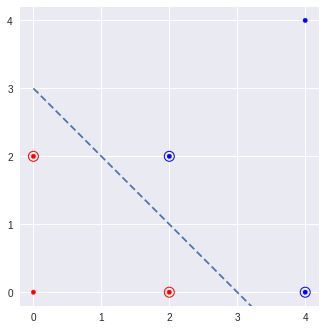

In [2]:
### THEORETICAL 1
  
## Load the dataset
X = np.array([[2,2],[4,4],[4,0],[0,0],[2,0],[0,2]])
N,P = X.shape
y = np.array([1, 1, 1, -1, -1, -1]).reshape(N,1)

## Set the graph properties and scatter the data points
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.xlim(-0.2, 4.2)
plt.ylim(-0.2, 4.2)
plt.xticks(range(0, 5, 1))
plt.yticks(range(0, 5, 1))

## Define the boundary by inspection, and compute the support vectors and margin
w = (w0, w1, w2) = (-3, 1, 1) 
distances = np.abs(w0 + w1 * X[:,0] + w2 * X[:,1]) / sqrt(w1**2 + w2**2)
gamma = np.min(distances)
sv_indices = np.where(distances == gamma)

## Report all results
print('Distances:', distances)
print('Margin:', 2*gamma)
plot(X, y, w=w, sv_indices=sv_indices)

## [SVM cont'd, 5 points]


Consider the same problem from above.

a. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given.

b. Give the optimal primal solution **for this specific**.

c. Write the dual formulation **for this specific**.

d. Give the optimal dual solution, comment on support vectors.

### Answer

It is possible to compute the optimal solution of the primal by hand because we just need to deal with integers calculations. However, for the dual problem, the optimal values for the alphas are likely to be decimal numbers, which makes the calculations by hand much more tedious and difficult. Hence, we decided to use the quadratic solver in the `cvxopt` package to solve both the primal and dual. The quadratic solver receives 6 parameters (`P,q,G,h,A,b`), where the last 4 are optional, and it can solve the following optimization problem:

$$\begin{matrix}
  \displaystyle \underset{\mathbf{x}}{\text{argmin}} 
  & \dfrac{1}{2}\mathbf{x}^\mathsf{T}P\mathbf{x} + \mathbf{q}^\mathsf{T}\mathbf{x}
\end{matrix}$$
$$\begin{matrix}
  \textrm{s.t.} 
  & G\mathbf{x} & \leq &\mathbf{h} \\
  & A\mathbf{x} & = & \mathbf{b}
\end{matrix}
$$

#### (Part A)

Plugging the data straight into the primal formula in [lecture 8](http://www.cse.chalmers.se/research/lab/mlcourse/lecture8_2018.pdf)  (page 13), we get the following primal:

$$\begin{matrix}
  \displaystyle \underset{\mathbf{w},\,b}{\text{argmin}} 
  & \dfrac{1}{2}(w_1^2 + w_2^2)
\end{matrix}$$
$$\begin{matrix}
  \textrm{s.t.} 
  & 2w_1 + 2w_2 + b & \geq & 1 \\
  & 4w_1 + 4w_2 + b & \geq & 1 \\
  & 4w_1 + b & \geq & 1 \\
  & -b & \geq & 1 \\
  & -2w_1 - b & \geq & 1 \\
  & -2w_2 - b & \geq & 1
\end{matrix}
$$

#### (Part B)

In order to use `cvxopt` to solve the primal, we first let $w_0 := b$, such that $\mathbf{w} = (w_0, w_1, w_2)$ is a 3D vector containing all the parameters. To accommodate this change, each of our training examples must also be a 3D vector, with the value 1 being padded in the first dimension. We must also multiply each primal constraint with -1 to reverse the sign of the inequality.

In the primal, let $X$ be the dataframe of N data points of 3 dimensions (where the first dimension is padded with 1, and the other two dimensions are for the features themselves). Let $\mathbf{y}$ be the target vector. We  use the star notation \[\*\] to indicate element-wise multiplication of vectors or matrices. By vectorizing the primal problem in part A, we get:

$$\begin{matrix}
  \displaystyle \underset{\mathbf{w}}{\text{argmin}} 
  \dfrac{1}{2}\mathbf{w}^\mathsf{T}P\mathbf{w}
\end{matrix}$$
$$\begin{matrix}
  \textrm{s.t.} & G\mathbf{w} = -\mathbf{y} * (X\mathbf{w}) \leq \mathbf{h}
\end{matrix}
$$
where:
$$\begin{matrix}
  \mathbf{w} = \begin{bmatrix} w_0 \\ w_2 \\ w_2 \end{bmatrix}
  && P = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
  && G = \begin{bmatrix} -1 & -2 & -2 \\ -1 & -4 & -4 \\ -1 & -4 & 0 \\ 1 & 0 & 0 \\ 1 & 2 & 0 \\ 1 & 0 & 2 \end{bmatrix}
  && h = \begin{bmatrix} -1 \\ -1 \\ -1 \\ -1 \\ -1 \\ -1 \end{bmatrix}
\end{matrix}
$$

This is plugged directly into the quadratic solver of the `cvxopt` package, ignoring the parameters (`q,A,b`) by assuming that they are the $0$ vectors or the $0$ matrix.

#### (Part C)

Plugging the data straight into the dual formula in [lecture 8](http://www.cse.chalmers.se/research/lab/mlcourse/lecture8_2018.pdf)  (page 13) and then simplifying, we get the dual below.

$$\begin{matrix}
  \displaystyle \underset{\alpha}{\text{argmax}} \, F(\alpha)
\end{matrix}$$
$$\begin{matrix}
  \textrm{s.t.} & \alpha_1 + \alpha_2 + \alpha_3 - \alpha_4 - \alpha_5 - \alpha_6 = 0, & \text{and} & \alpha_i \geq 0
\end{matrix}
$$
where $F(\alpha)$ is the objective function, and it is defined as:
$$
F(\alpha) = \sum_{i=1}^{6}\big(\alpha_{i}\big) 
- 4\alpha_1^2 - 16\alpha_2^2 - 8\alpha_3^2 - 2\alpha_5^2 - 2\alpha_6^2
- 16\alpha_1\alpha_2 - 8\alpha_1\alpha_3 + 4\alpha_1\alpha_5 + 4\alpha_1\alpha_6
- 16\alpha_2\alpha_3 + 8\alpha_2\alpha_5 + 8\alpha_2\alpha_6 + 8\alpha_3\alpha_5
$$

#### (Part D)

To make it easier, we will work on the general formula for the dual in the lecture, instead of the specific dual that we defined in part C. To transform the dual into an input that is accepted by the quadratic solver, we must first reverse the sign of the objective function, such that the original maximization problem becomes a minimization problem. We also need to multiply by the inequality by -1 to change the inequality sign. After the transformation, the problem becomes:

$$\underset{\alpha}{\text{argmin}} \;\;
  \dfrac{1}{2}\sum_{i,j=1}^{N}\alpha_i\alpha_j y_i y_j \mathbf{x}_i^\mathsf{T}\mathbf{x}_j - 
  \sum_{i=1}^{N}\alpha_i
$$
$$\begin{matrix}
  \textrm{s.t.} 
  & -\alpha_i & \leq & 0 & \forall i \\
  & \sum_{i=1}^{N}\alpha_i y_i & = & 0
\end{matrix}
$$

Our job now is to vectorize everything, which is pretty straight forward. We use $X$ to represent the normal N-by-2 dataframe, and $\mathbf{y}$ to represent the corresponding targets. We also denote $I$ as the identity matrix. Then after the vectorization, the problem becomes:

$$\underset{\alpha}{\text{argmin}} \;\;
  \dfrac{1}{2}\alpha^\mathsf{T}(\mathbf{y}\mathbf{y}^\mathsf{T} * XX^\mathsf{T}) \alpha
$$
$$\begin{matrix}
  \textrm{s.t.} 
  & -I\alpha & \leq & \mathbf{0} \\
  & \mathbf{y}^\mathsf{T}\alpha & = & 0
\end{matrix}
$$
where the parameters to the `cvxopt` are:
$$\begin{matrix}
  P = \mathbf{y}\mathbf{y}^\mathsf{T} * \mathbf{X}\mathbf{X}^\mathsf{T}
  &&& \mathbf{q} = \mathbf{0} 
  &&& G = -I 
  &&& \mathbf{h} = \mathbf{0}
  &&& A = \mathbf{y}^\mathsf{T}
  &&& b = 0
\end{matrix}
$$

As you can see from the printout results below, the optimal dual solution have 4 values that are positive, while the other 2 are zeros. These 4 positive values correspond exactly to the support vectors found in the first theoretical question. Computing the boundary parameters from the dual solution can easily be done by using the formula in [lecture 8](http://www.cse.chalmers.se/research/lab/mlcourse/lecture8_2018.pdf)  (page 14). Note that only support vectors can be used to compute $w_0$ (i.e. $\mathbf{x}_k$ must be a support vector).

$$
\begin{bmatrix} w_1 \\w_2 \end{bmatrix} = \sum_{i=1}^{N}\alpha_i\mathbf{y}_i\mathsf{x}_i, \;\;\;\;\;\;\;
w_0 = y_k - \begin{bmatrix} w_1 \\w_2 \end{bmatrix}^\mathsf{T}\mathbf{x}_k
$$

Even though $w_0$ can be computed using a single support vector, we compute it using all the support vectors and then take the mean to get a more numerically stable result. See the codes below for the vectorized version!


In [3]:
### THEORETICAL 2

## PRIMAL objective function
P_primal = cvxopt.matrix(np.array([[0,0,0],[0,1,0],[0,0,1]]), tc='d')
q_primal = cvxopt.matrix(np.zeros(3), tc='d')

## PRIMAL inequality constraints
G_primal = cvxopt.matrix(-np.insert(X,0,1,axis=1) * y, tc='d')
h_primal = cvxopt.matrix(-np.ones(N), tc='d')

## DUAL objective function
P_dual = cvxopt.matrix(np.dot(y,y.T) * np.dot(X,X.T), tc='d')
q_dual = cvxopt.matrix(-np.ones(N), tc='d')

## DUAL inequality constraints
G_dual = cvxopt.matrix(-np.eye(N), tc='d')
h_dual = cvxopt.matrix(np.zeros(N), tc='d')

## DUAL equality constraints
A_dual = cvxopt.matrix(y.T, tc='d')
b_dual = cvxopt.matrix(0, tc='d')

## Solving the PRIMAL
w0, w1, w2 = cvxopt.solvers.qp(P_primal, q_primal, G_primal, h_primal)['x']
print('Primal solution is (w0, w1, w2): (%.1f, %.1f, %.1f)' % (w0, w1, w2))

## Solving the DUAL
alpha = cvxopt.solvers.qp(P_dual, q_dual, G_dual, h_dual, A_dual, b_dual)['x']
alpha = np.around(np.array(alpha), decimals=7) 
print("Dual solution is (alpha):\n", alpha, sep='')

## Deriving primal solution from the dual solution
sv_indices = np.where(alpha > 0)[0]
w1, w2 = np.dot(X.T, y*alpha)
w0 = np.mean(y[sv_indices] - np.dot(X[sv_indices], np.array([w1, w2])))
print("Params found from dual solution are (w0, w1, w2): (%.1f, %.1f %.1f)" % (w0, w1, w2))

Primal solution is (w0, w1, w2): (-3.0, 1.0, 1.0)
Dual solution is (alpha):
[[0.7578024]
 [0.       ]
 [0.2421976]
 [0.       ]
 [0.7421976]
 [0.2578024]]
Params found from dual solution are (w0, w1, w2): (-3.0, 1.0 1.0)


# Practical problems

All data files can be loaded using the following code for example:
```python
import numpy as np
data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
```
For this assigment, you may use sklearn.svm.SVC or sklearn.svm.NuSVC. 

## [SVM, 5 points]

Consider the dataset **d1.txt** having two-dimensional points $X$ and corresponding labels $Y$.

a. Train an SVM (with linear kernel) on the above data.

b. Plot the data and the separating hyperplane of the trained classifier. Color the points of one class red and the other blue. Mark points that could not be separated correctly. Also, mark the support vectors.

c. Does the classifier have bias, and if so, what is it?

d. What is the (soft) margin?

Bias: 2.4538428026349837
Soft margin: 0.14903465923195416


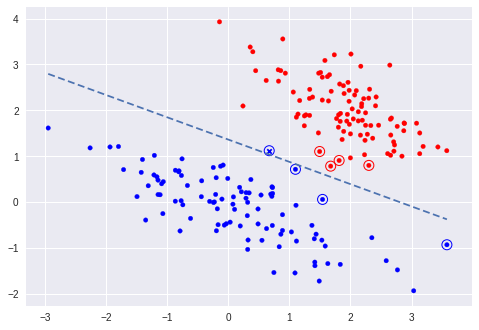

In [6]:
### PRACTICAL 1

## Load the data set
data = np.loadtxt('d1.txt')
X, y = data[:,:-1], data[:,-1]

## Train the model and get the hyperplane
model = svm.SVC(kernel='linear')
model.fit(X, y)
w1, w2 = model.coef_[0]
w0 = model.intercept_[0]

## Compute the soft margin, report the results, and make the plot
distances = np.abs(w0 + w1 * X[:,0] + w2 * X[:,1]) / sqrt(w1**2 + w2**2)
margin = 2*np.min(distances)
print('Bias:', w0)
print('Soft margin:', margin)
plot(X, y, w=(w0,w1,w2), model=model)

## [Kernels, 5 points]

Download the dataset **d2.txt**. Consider the following kernels.

* Linear kernel
* Quadratic kernel 
* Radial Basis Function (RBF) kernel

a. Train an SVM with the linear kernel on all of the data (d2.txt). Plot the data. Color the points of one class red and the other blue. Mark points that could not be separated correctly by the trained model.

b. Plot the decision surfaces for the Quadratic and RBF kernel seperately.

### Answer

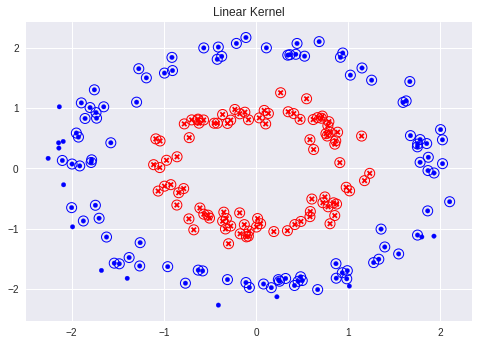

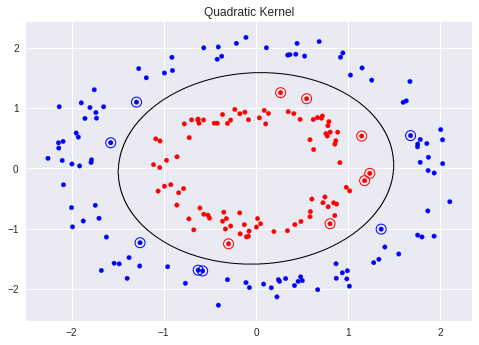

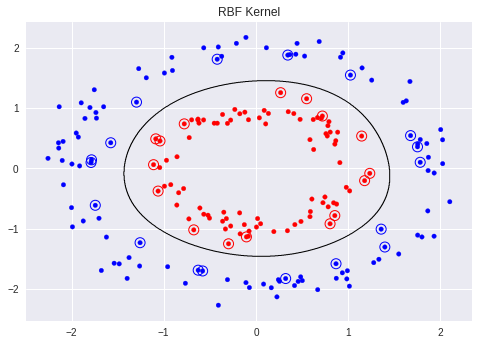

In [7]:
### PRACTICAL 2

## Load the data set
data = np.loadtxt('d2.txt')
X, y = data[:,:-1], data[:,-1]

## Linear kernel
model1 = svm.SVC(kernel='linear')
model1.fit(X,y)
plot(X, y, plot_boundary=False, model=model1, title='Linear Kernel')

## Quadratic kernel
model2 = svm.SVC(kernel='poly', degree=2)
model2.fit(X,y)
plot(X, y, model=model2, title='Quadratic Kernel')

## RBF kernel
model3 = svm.SVC(kernel='rbf')
model3.fit(X,y)
plot(X, y, model=model3, title='RBF Kernel')